In [57]:
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
##Importing Data files
btc = pd.read_csv("/content/drive/MyDrive/green canva/BTC.csv")
nvda = pd.read_csv("/content/drive/MyDrive/green canva/NVDA.csv")

print(btc.shape,nvda.shape)

(126990, 9) (141279, 9)


In [88]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result 

In [89]:
##Data Processing BTC File
btc_X = btc.iloc[:,[1,2,3,4,5,6]].copy()
btc_Y = btc.iloc[:,[7,8]].copy()

#normalization
btc_ = normalize(btc_X)
btc = pd.concat([btc_,btc_Y],axis=1)
print(btc.head())

          O         H         L         C         V        DV  pctGain/Loss  \
0  0.090018  0.089246  0.090167  0.090986  0.272828  0.000811      0.004481   
1  0.091092  0.089600  0.090766  0.091153  0.286121  0.016047     -0.004061   
2  0.091107  0.089759  0.091171  0.091001  0.269569  0.000037     -0.002973   
3  0.091107  0.089552  0.090931  0.090773  0.271621  0.001446     -0.011494   
4  0.090879  0.089484  0.091070  0.090588  0.270883  0.000726      0.007366   

   classification_target  
0                    1.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    1.0  


In [90]:
##Data Processing NVDA File
nvda_X = nvda.iloc[:,[1,2,3,4,5,6]].copy()
nvda_Y = nvda.iloc[:,[7,8]].copy()

#normalization
nvda_X = normalize(nvda_X)
nvda = pd.concat([nvda_X,nvda_Y],axis=1)
print(nvda.shape)

(141279, 8)


In [91]:
####Combining Normalized Datasets
df = pd.concat([btc,nvda],axis=0)
print(df.shape)



(268269, 8)


In [92]:
###Splitting Data into Training and Test Data
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size=0.3,random_state=50)
train = train.fillna(0)
test = test.fillna(0)

#train
train_X = train.iloc[:,[0,1,2,3,4,5]].copy()
train_Y1 = train.iloc[:,[6]].copy()    ##gain 
train_Y2 =  train.iloc[:,[7]].copy()    ##classification

#test
test_X = test.iloc[:,[0,1,2,3,4,5]].copy()
test_Y1 = test.iloc[:,[6]].copy()    ##gain 
test_Y2 =  test.iloc[:,[7]].copy()    ##classification

print( test_Y2.shape)
print( train_Y2.shape)


(80481, 1)
(187788, 1)


In [93]:
### Model for pctGain/Loss Prediction
##Applying multivariant linear regression

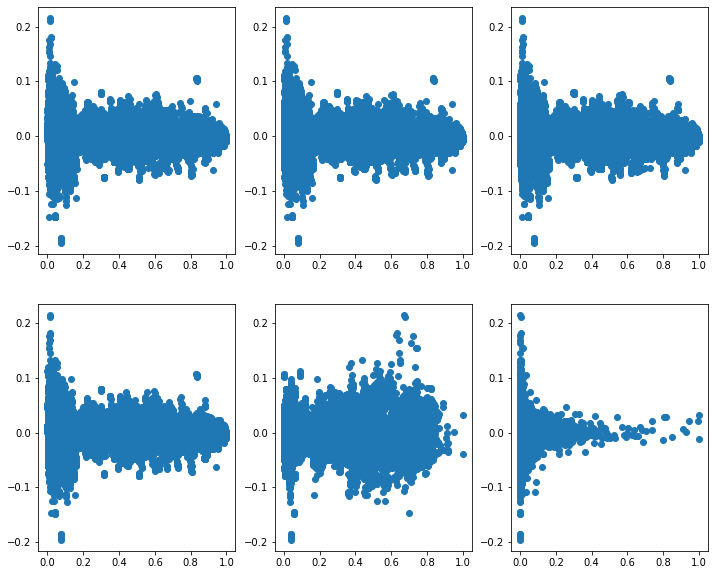

In [98]:
from sklearn import linear_model
import matplotlib.pyplot as plt


## Plotting dependent variables againt independent variables to show distribution of normalized data
fig,ax = plt.subplots(2,3,figsize=(12,10))
 
y=df['pctGain/Loss']

ax[0][0].scatter(df["O"],y)
ax[0][1].scatter(df["H"],y)
ax[0][2].scatter(df["L"],y)
ax[1][0].scatter(df["C"],y)
ax[1][1].scatter(df["V"],y)
ax[1][2].scatter(df["DV"],y)



In [66]:
from sklearn import linear_model
import statsmodels.api as sm

## Creating and implementing model
x=train_X  #independent variables
y=train_Y1  #dependent variable

# Regression Model
reg = linear_model.LinearRegression()
reg.fit(x,y)

print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

#Predicted Values
predict = reg.predict(test_X)

Intercept: 
 [0.00023505]
Coefficients: 
 [[-0.38992556  0.93834866  0.44289218 -0.99312836  0.00419623  0.00183382]]


In [67]:
predict.shape

(80481, 1)

In [68]:
from sklearn.metrics import mean_squared_error 

## Mean Squared Value to check Accuracy   
mean_squared_error(test_Y1,predict)

0.00015206484187205274

Text(0.5, 0, 'True Values')

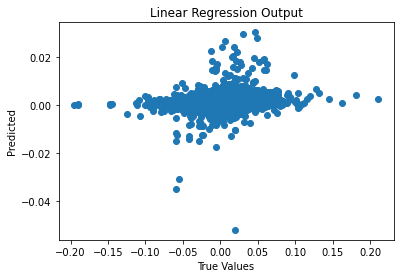

In [69]:
## Plotting predicted values against true values
plt.scatter(test_Y1,predict)
plt.title("Linear Regression Output")
plt.ylabel("Predicted")
plt.xlabel("True Values")

In [70]:
### Binary Classification using Neural Network

In [71]:
##Slicing dataset for neural network, converting into numpy array
train = train.values
test = test.values

xtrain = train[:,:6]
ytrain = train[:,7]
xtest = test[:,:6]
ytest = test[:,7]

In [72]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Encoding classifiers
encoder = LabelEncoder()
encoder.fit(ytrain)
encoded_Y = encoder.transform(ytrain)


# create model
model = Sequential()
model.add(Dense(60, input_shape=(6,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))    #activation function for binary classification 
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x,encoded_Y,batch_size=64,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
2935/2935 [==============================] - 8s 2ms/step - loss: 0.6695 - accuracy: 0.6045 - val_loss: 0.6681 - val_accuracy: 0.6074
Epoch 2/20
2935/2935 [==============================] - 8s 3ms/step - loss: 0.6691 - accuracy: 0.6049 - val_loss: 0.6679 - val_accuracy: 0.6067
Epoch 3/20
2935/2935 [==============================] - 17s 6ms/step - loss: 0.6691 - accuracy: 0.6049 - val_loss: 0.6678 - val_accuracy: 0.6070
Epoch 4/20
2935/2935 [==============================] - 14s 5ms/step - loss: 0.6688 - accuracy: 0.6049 - val_loss: 0.6676 - val_accuracy: 0.6068
Epoch 5/20
2935/2935 [==============================] - 8s 3ms/step - loss: 0.6686 - accuracy: 0.6049 - val_loss: 0.6679 - val_accuracy: 0.6068
Epoch 6/20
2935/2935 [==============================] - 10s 3ms/step - loss: 0.6683 - accuracy: 0.6050 - val_loss: 0.6670 - val_accuracy: 0.6070
Epoch 7/20
2935/2935 [==============================] - 8s 3ms/step - loss: 0.6681 - accuracy: 0.6048 - val_loss: 0.6668 - val_accura

In [74]:
score = model.evaluate(xtest,ytest,verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.666415274143219
Test accuracy: 0.6073731780052185


In [75]:
y_pred= model.predict(xtest)
y_pred

2516/2516 [==============================] - 5s 2ms/step


array([[0.44563907],
       [0.42465624],
       [0.37054223],
       ...,
       [0.3576531 ],
       [0.3638686 ],
       [0.45368516]], dtype=float32)

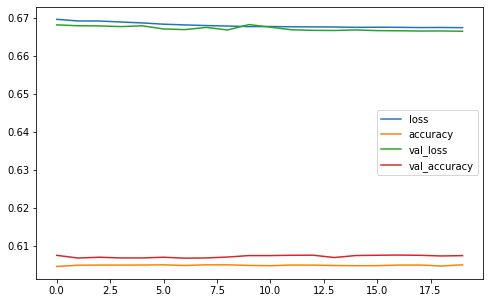

In [76]:
## Graph to show accuracy of model
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [77]:
##### Binary Classification using Linear Regression

In [78]:
from sklearn import linear_model
import statsmodels.api as sm

x=xtrain
y=ytrain

reg = linear_model.LinearRegression()
reg.fit(x,y)

print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

predict = reg.predict(xtest)
predict = np.rint(predict)  ##Round values to 0 or 1

Intercept: 
 0.4129493935577974
Coefficients: 
 [ -7.33075429  25.82179963  -1.93098029 -16.6688273    0.18140246
   0.33666145]


In [79]:
from sklearn.metrics import accuracy_score
## Check Accuracy of Model
accuracy_score(ytest,predict)

0.6095972962562592

In [80]:
 ## Conclusion: Accuracy of Neural Network and Linear Regression are very similar therfore most likely the models are working at their best capability.